# <font color="#1f618d">Risk Analytics: Navigating the Uncharted Waters of Business Challenges

## <font color=" #0e6655">A data-driven approach to navigating uncertainties

### <font color="#909497">Table of content

1. [Background](#background)
2. [Data exploration and cleaning](#data_exploration_and_cleaning)
3. [Descriptive statistics](#descriptive_statistics)
4. [Data visualization](#data_visualization)
5. [Risk prediction modeling](#risk_prediction_modeling)
6. [Conclusions and recommendations](#conclusions_and_recommendations)
7. [Bonus](#bonus)

In this project, I will perform an in-depth analysis of a risk assessment dataset. The dataset comprises various risks faced by an organization, categorized by risk group and subgroups, along with their likelihood of occurrence, potential impact, mitigating measures, and their corresponding scores. Together, we'll uncover patterns, derive insights, and craft models to better understand the underlying dynamics of the dataset. Strap in and get ready for a thrilling data adventure!

`The dataset for this project was self-created and the data is totally ficticious. No real-life data was used to create this portfolio project!`

### <font color="#117a65">1. Background<a id='background'></a>

Risk management is an integral part of any business. Understanding, evaluating, and taking strategic decisions on handling these risks is vital for the survival and growth of the organization. This analysis aims to gain insights from past data and develop a predictive model that helps in proactive decision making.

Risk analysis is a multifaceted field that revolves around identifying, assessing, and prioritizing uncertainties that businesses or industries face. In a rapidly changing world, understanding and managing risks can be the difference between success and failure, growth and stagnation, or profit and loss. This dataset presents a golden opportunity for us to understand the dimensions of risk and the variables that influence it. 

In the ever-complex tapestry of today's business world, identifying and mitigating risks is more crucial than ever. From the ripples of global events like pandemics to the challenges of expanding into new markets, risks lurk in every corner. Through this analysis, we aim to shine a light on these risks, offering a beacon for safer navigation.

By delving deep into the data, we aim to not only understand the nuances of risk but also provide actionable insights that could help in strategic decision-making.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [2]:
# Loading the data
df = pd.read_excel(f'data/final_refined_risk_data_xl.xlsx')

### <font color="#117a65">2. Data exploration and cleaning<a id='data_exploration_and_cleaning'></a>

Let's start by taking a closer look at our data. Before diving deep, it's essential to understand our data's landscape. Upon initial examination, we found that 'Operational' risks dominate our dataset, hinting at their recurrent nature and the emphasis on operational efficiency. We will check the data for any inconsistencies, missing values, and outliers that might affect our analysis.

In [3]:
# Display the first few rows of the dataframe
df.head()

,RiskID,Risk Group,Risk Subgroup,Risk Description,Risk Responsible,Likelihood of Occurrence,Likelihood Score,Potential Net Impact (EUR),Scoring for Mitigating Measures,Mitigating Measures Description,Risk Level
0,R4382,Strategic,Business Strategy Risk,This risk pertains to Business Strategy Risk. ...,Jordan Miller,Likely,4,4.130614e+07,3.0,Proactive measures with a score of 3 have been...,1
1,R1507,Strategic,Change Management Risk,This risk pertains to Change Management Risk. ...,Mary Thomas,Likely,4,1.493591e+05,1.0,Proactive measures with a score of 5 have been...,4
2,R1545,Legal,Litigation Risk,This risk pertains to Litigation Risk. It may ...,Noah Smith,Rare,1,7.560812e+06,3.0,Proactive measures with a score of 3 have been...,2
3,R0121,Project,Project Management Risk,This risk pertains to Project Management Risk....,Monica Boyd,Possible,3,1.393172e+06,4.0,Proactive measures with a score of 4 have been...,1
4,R1647,Legal,Employment Law Risk,This risk pertains to Employment Law Risk. It ...,Charles Brown,Likely,4,4.674494e+06,2.0,Proactive measures with a score of 2 have been...,4


In [4]:
df.shape

(5067, 11)

The dataset consists of 5067 rows in 11 columns:

- **RiskID**: A unique identifier for each risk.
- **Risk Group**: The broader category of risk (e.g., Strategic, Legal).
- **Risk Subgroup**: A more specific classification within the risk group.
- **Risk Description**: A detailed description of the risk.
- **Risk Responsible**: The person responsible for managing or overseeing this risk.
- **Likelihood of Occurrence**: A qualitative measure of how likely the risk is to occur.
- **Likelihood Score**: A numerical score corresponding to the likelihood.
- **Potential Net Impact (EUR)**: The potential monetary impact of the risk in Euros.
- **Scoring for Mitigating Measures**: A score indicating the effectiveness of measures taken to mitigate the risk.
- **Mitigating Measures Description**: A description of the mitigating measures taken.
- **Risk Level**: A numerical level indicating the severity of the risk.

This dataset appears to be focused on a comprehensive risk assessment, with both qualitative and quantitative aspects.

Let's take a closer look at the data, starting with its size and structure, and checking for missing values. We will also investigate the unique values in each categorical column. This will help us get a better understanding of the data quality and distribution.

**Steps for EDA & Data Cleaning**:

1. **Check for Missing Values**: Any missing values can distort our analysis. It's crucial to identify and handle them appropriately.
2. **Examine Distributions & Outliers**: Understand the distribution of numerical variables and check for potential outliers.
3. **Check for Duplicates**: Ensure there are no duplicate rows in the dataset.
4. **Validate Data Consistency**: Make sure categories and scores align, such as the alignment between 'Likelihood of Occurrence' and 'Likelihood Score'.

In [5]:
# Convert 'Likelihood of Occurrence' to an ordered categorical variable
ordered_likelihood = ['Rare', 'Unlikely',
                      'Possible', 'Likely', 'Almost certain']
df['Likelihood of Occurrence'] = pd.Categorical(
    df['Likelihood of Occurrence'], categories=ordered_likelihood, ordered=True)

# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   RiskID                           5067 non-null   object  
 1   Risk Group                       5065 non-null   object  
 2   Risk Subgroup                    5065 non-null   object  
 3   Risk Description                 5067 non-null   object  
 4   Risk Responsible                 5065 non-null   object  
 5   Likelihood of Occurrence         5067 non-null   category
 6   Likelihood Score                 5067 non-null   int64   
 7   Potential Net Impact (EUR)       5067 non-null   float64 
 8   Scoring for Mitigating Measures  5065 non-null   float64 
 9   Mitigating Measures Description  5067 non-null   object  
 10  Risk Level                       5067 non-null   int64   
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 401.1+ 

In [6]:
# Checking for missing values
df.isnull().sum()

RiskID                             0
Risk Group                         2
Risk Subgroup                      2
Risk Description                   0
Risk Responsible                   2
Likelihood of Occurrence           0
Likelihood Score                   0
Potential Net Impact (EUR)         0
Scoring for Mitigating Measures    2
Mitigating Measures Description    0
Risk Level                         0
dtype: int64

**Missing Values Overview**:

- **Risk Group**: 2 missing values
- **Risk Subgroup**: 2 missing values
- **Risk Responsible**: 2 missing values
- **Scoring for Mitigating Measures**: 2 missing values

Given the nature of our dataset and the significance of these columns, it's not ideal to remove the rows with missing values outright. Instead, we can consider imputing them based on the context and the data available. For categorical columns, we could impute with the mode (most frequent value) or consider a more sophisticated approach if needed.

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

No dublicates in the dataset.

**Next Steps**:

1. Impute missing values for the 'Risk Group', 'Risk Subgroup', and 'Risk Responsible' columns using the mode.
2. For 'Scoring for Mitigating Measures', since it's numerical but based on a scoring system, we'll also use the mode for imputation.
3. Check the distribution of numerical columns to identify potential outliers.
4. Verify there are no duplicates in the dataset.
5. Validate data consistency.

In [8]:
# Imputing missing values using mode
columns_to_impute = ['Risk Group', 'Risk Subgroup',
                     'Risk Responsible', 'Scoring for Mitigating Measures']

for column in columns_to_impute:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Verifying if all missing values have been imputed
missing_after_imputation = df.isnull().sum()

missing_after_imputation

RiskID                             0
Risk Group                         0
Risk Subgroup                      0
Risk Description                   0
Risk Responsible                   0
Likelihood of Occurrence           0
Likelihood Score                   0
Potential Net Impact (EUR)         0
Scoring for Mitigating Measures    0
Mitigating Measures Description    0
Risk Level                         0
dtype: int64

In [9]:
# Check the unique values in each categorical column
unique_values = {column: df[column].nunique(
) for column in df.select_dtypes(include=['object']).columns}
unique_values

{'RiskID': 5000,
 'Risk Group': 10,
 'Risk Subgroup': 40,
 'Risk Description': 159,
 'Risk Responsible': 2975,
 'Mitigating Measures Description': 28}

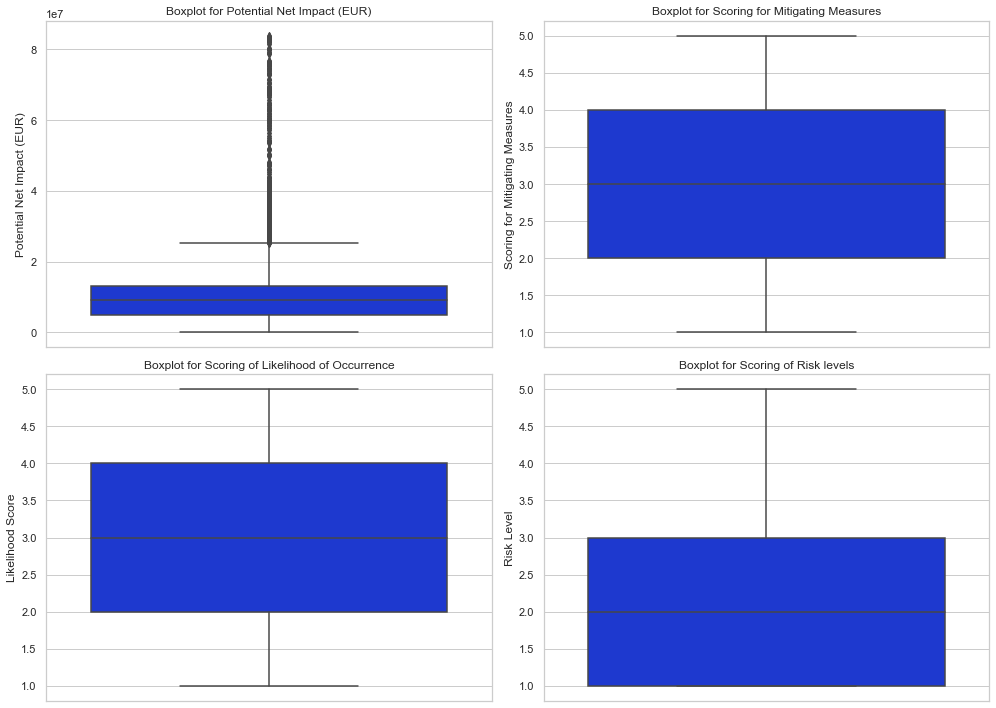

In [33]:
# Set up the plotting style
sns.set_style("whitegrid")
sns.set_palette("winter")

# Plot boxplots for the four numerical columns
plt.figure(figsize=(14, 10))

# Boxplot for Potential Net Impact (EUR)
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Potential Net Impact (EUR)'])
plt.title('Boxplot for Potential Net Impact (EUR)')

# Boxplot for Scoring of Mitigating Measures
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Scoring for Mitigating Measures'])
plt.title('Boxplot for Scoring for Mitigating Measures')

# Boxplot for Scoring of Likelihood of Occurrence
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Likelihood Score'])
plt.title('Boxplot for Scoring of Likelihood of Occurrence')

# Boxplot for Scoring of Risk levels
plt.subplot(2, 2, 4)
sns.boxplot(y=df['Risk Level'])
plt.title('Boxplot for Scoring of Risk levels')

plt.tight_layout()
plt.show()


Next, let's examine the distributions of our numerical columns:

- Likelihood Score
- Potential Net Impact (EUR)
- Scoring for Mitigating Measures
- Risk Level

This will help us identify any potential outliers and gain a better understanding of the spread of our data.

**EDA & Data Cleaning: Recap**

- **Missing Values**: We identified and imputed missing values in the 'Risk Group', 'Risk Subgroup', 'Risk Responsible', and 'Scoring for Mitigating Measures' columns.
- **Distributions & Outliers**: We reviewed the distributions of our numerical columns and noted potential outliers in the 'Potential Net Impact (EUR)' column.
- **Duplicates**: No duplicate rows were found in the dataset.
- **Data Consistency**: We confirmed that the 'Likelihood of Occurrence' and 'Likelihood Score' are aligned and consistent.

With our data cleaned and preliminary explorations done, we can dive deeper into the dataset's descriptive statistics.

### <font color="#117a65">3. Descriptive statistics<a id='descriptive_statistics'></a>

Once we have clean data, we will explore it further by looking at some descriptive statistics. We will check the distribution of risk levels, the average potential impact for each risk level, and the effectiveness of mitigating measures. Every risk tells a story. Some are tales of caution, others of opportunity. While we haven't delved into sentiment analysis, a broad observation suggests that a significant portion of the risks leans towards caution, indicating areas we need to address.

Descriptive statistics offer a snapshot of the central tendencies, spread, and shape of a dataset's distribution. Let's derive some of these key statistics for our numerical columns to better understand their characteristics.

In [11]:
# Descriptive statistics
df.describe()

,Likelihood Score,Potential Net Impact (EUR),Scoring for Mitigating Measures,Risk Level
count,5067.000000,5.067000e+03,5067.000000,5067.000000
mean,2.991711,1.128831e+07,3.046576,2.307677
std,1.229462,1.148461e+07,1.430935,1.079301
min,1.000000,5.226753e+03,1.000000,1.000000
25%,2.000000,5.001990e+06,2.000000,1.000000
50%,3.000000,9.050833e+06,3.000000,2.000000
75%,4.000000,1.312250e+07,4.000000,3.000000
max,5.000000,8.385369e+07,5.000000,5.000000


In [12]:
# Distribution of Likelihood
df['Likelihood of Occurrence'].value_counts()

Possible          1459
Likely            1246
Unlikely          1012
Rare               744
Almost certain     606
Name: Likelihood of Occurrence, dtype: int64

In [13]:
# Distribution of risk levels
df['Risk Level'].value_counts()

2    1701
1    1394
3    1027
4     909
5      36
Name: Risk Level, dtype: int64

In [14]:
# Average potential impact for each risk level
df.groupby('Risk Level')['Potential Net Impact (EUR)'].mean()

Risk Level
1    1.112559e+07
2    1.138756e+07
3    1.144602e+07
4    1.111925e+07
5    1.266971e+07
Name: Potential Net Impact (EUR), dtype: float64

In [15]:
# Effectiveness of mitigating measures
df.groupby('Risk Level')['Scoring for Mitigating Measures'].mean()

Risk Level
1    3.343615
2    2.652557
3    2.730282
4    3.658966
5    3.722222
Name: Scoring for Mitigating Measures, dtype: float64

**Descriptive Statistics Insights:**

1. **Likelihood Score**:
    - Ranges from 1 to 5.
    - The average likelihood score is approximately 3, indicating that most risks fall within the "Possible" category.
    - The median is 3, aligning with the mean.


2. **Potential Net Impact (EUR)**:
    - The potential impact varies significantly, ranging from as low as approximately €5,227 to as high as €83,853,690.
    - The average potential impact is around €11,288,310, but the median is lower at approximately €9,050,833, suggesting a right-skewed distribution.


3. **Scoring for Mitigating Measures**:
    - Ranges from 1 to 5, with an average score of around 3.
    - This implies that, on average, the measures taken to mitigate risks are of moderate effectiveness.


4. **Risk Level**:
    - Ranges from 1 to 5, covering the entire spectrum of risk severity.
    - The average risk level is around 2.3, and the median is 2, suggesting that most risks are of low to moderate severity.

These statistics provide a foundational understanding of our dataset's numerical attributes. However, to truly grasp the nuances and patterns within our data, we'll need to visualize it.

### <font color="#117a65">4. Data visualization<a id='data_visualization'></a>

Visualizations will help us better understand our data and validate our hypotheses. We will create visualizations showing the distribution of risk levels, the relationship between the likelihood of occurrence and risk level, and the potential impact by risk level. Visuals can often convey what numbers can't. Through a series of charts and graphs, we've illustrated the risk distribution, a breakdown of potential impacts, and the correlation between risk likelihood and impact.

Visualization is an instrumental tool in data analysis. It not only makes complex data more understandable but can also reveal patterns, correlations, and trends that might go unnoticed in tabular format.

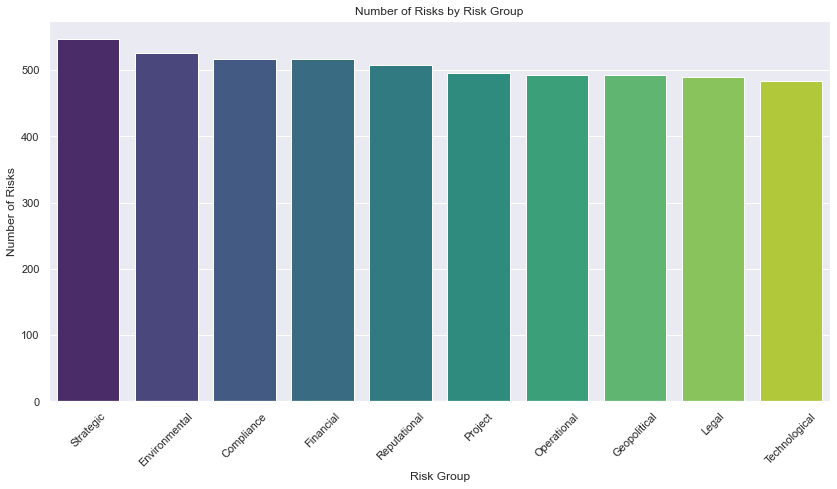

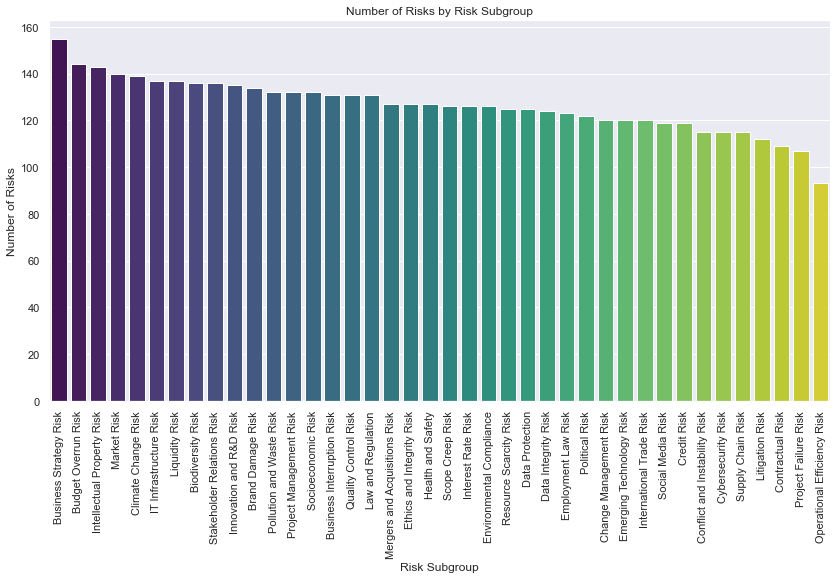

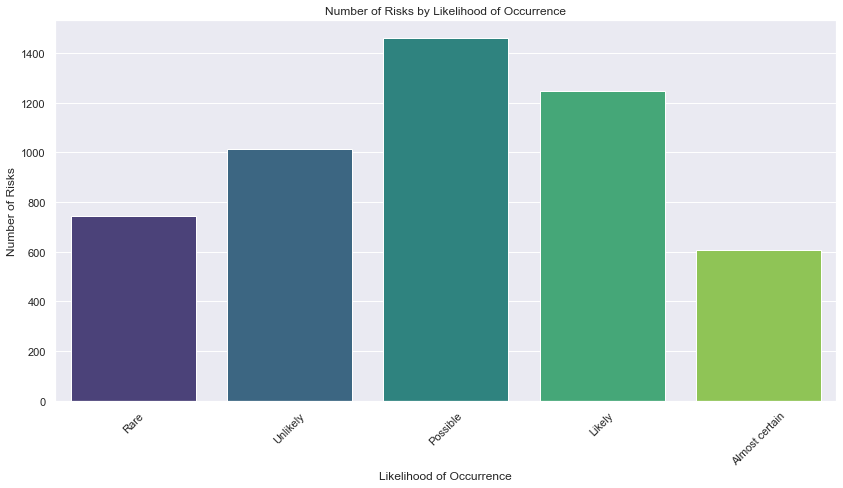

In [16]:
# Set the color palette and figure size for seaborn
sns.set_palette('winter')
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Create a bar chart showing the number of risks in each risk group
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Risk Group',
              order=df['Risk Group'].value_counts().index, palette='viridis')
plt.title('Number of Risks by Risk Group')
plt.xlabel('Risk Group')
plt.ylabel('Number of Risks')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart showing the number of risks in each risk subgroup
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Risk Subgroup',
              order=df['Risk Subgroup'].value_counts().index, palette='viridis')
plt.title('Number of Risks by Risk Subgroup')
plt.xlabel('Risk Subgroup')
plt.ylabel('Number of Risks')
plt.xticks(rotation=90)
plt.show()

# Create a bar chart showing the number of risks by likelihood of occurrence
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Likelihood of Occurrence',
              order=ordered_likelihood, palette='viridis')
plt.title('Number of Risks by Likelihood of Occurrence')
plt.xlabel('Likelihood of Occurrence')
plt.ylabel('Number of Risks')
plt.xticks(rotation=45)
plt.show()

Let's further explore the data by looking at the distribution of values in key columns. We'll start with 'Risk Group', 'Risk Level', 'Likelihood of Occurrence', and 'Scoring for Mitigating Measures'. This will provide insight into the types of risks in the dataset and their characteristics.

We'll also need to handle the missing values before proceeding with any modeling. But first, let's understand the data distribution. We can visualize this with bar plots.

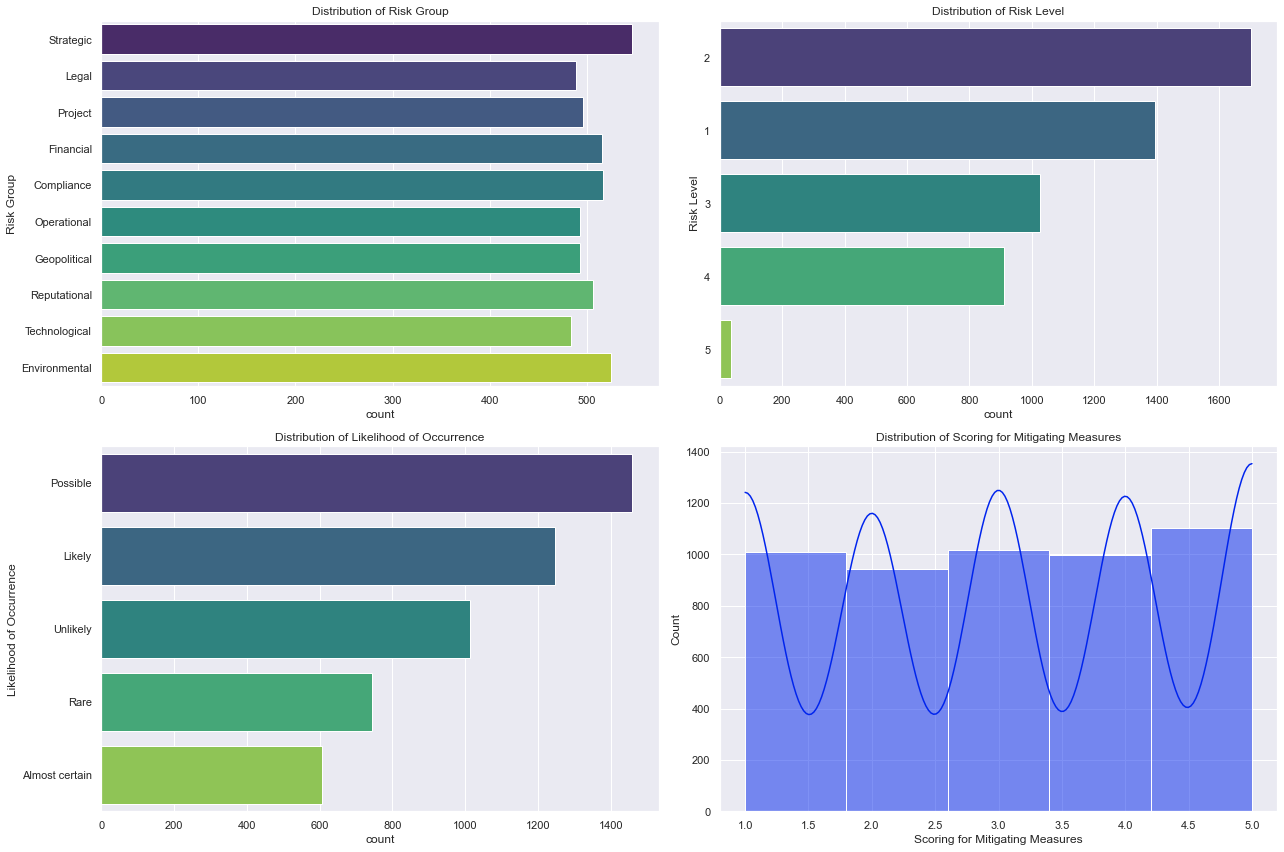

In [17]:
# Set custom color palette
sns.set_palette('winter')

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the distribution of 'Risk Group'
sns.countplot(ax=axes[0, 0], data=df, palette='viridis', y='Risk Group')
axes[0, 0].set_title('Distribution of Risk Group')

# Plot the distribution of 'Risk Level'
sns.countplot(ax=axes[0, 1], data=df, y='Risk Level',
              order=df['Risk Level'].value_counts().index, palette='viridis')
axes[0, 1].set_title('Distribution of Risk Level')

# Plot the distribution of 'Likelihood of Occurrence'
sns.countplot(ax=axes[1, 0], data=df, y='Likelihood of Occurrence',
              order=df['Likelihood of Occurrence'].value_counts().index, palette='viridis')
axes[1, 0].set_title('Distribution of Likelihood of Occurrence')

# Plot the distribution of 'Scoring for Mitigating Measures'
sns.histplot(ax=axes[1, 1], data=df,
             x='Scoring for Mitigating Measures', bins=5, kde=True, palette='viridis')
axes[1, 1].set_title('Distribution of Scoring for Mitigating Measures')

# Improve layout and display the plots
plt.tight_layout()
plt.show()

Let's now explore the quantitative aspect of the data: the potential financial impact of the risks. Visualizing this information will give us an idea of the scale and distribution of the potential losses related to these risks. We'll use a histogram to visualize the distribution of the 'Potential Net Impact (EUR)' column.

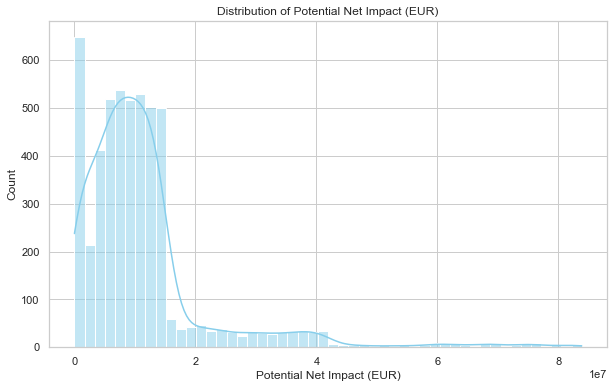

In [31]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot a histogram of 'Potential Net Impact (EUR)'
sns.histplot(data=df, x='Potential Net Impact (EUR)',
             kde=True, color='skyblue', bins=50)

# Set plot title and labels
plt.title('Distribution of Potential Net Impact (EUR)')
plt.xlabel('Potential Net Impact (EUR)')
plt.ylabel('Count')

# Display the plot
plt.show()

Next, it would be interesting to understand how the potential net impact is distributed across the different risk levels and risk groups. For this, we can use box plots, which provide a good visualization of the median, quartiles, and potential outliers in the data. Let's plot this next.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   RiskID                           5067 non-null   object  
 1   Risk Group                       5067 non-null   object  
 2   Risk Subgroup                    5067 non-null   object  
 3   Risk Description                 5067 non-null   object  
 4   Risk Responsible                 5067 non-null   object  
 5   Likelihood of Occurrence         5067 non-null   category
 6   Likelihood Score                 5067 non-null   int64   
 7   Potential Net Impact (EUR)       5067 non-null   float64 
 8   Scoring for Mitigating Measures  5067 non-null   float64 
 9   Mitigating Measures Description  5067 non-null   object  
 10  Risk Level                       5067 non-null   int64   
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 401.1+ 

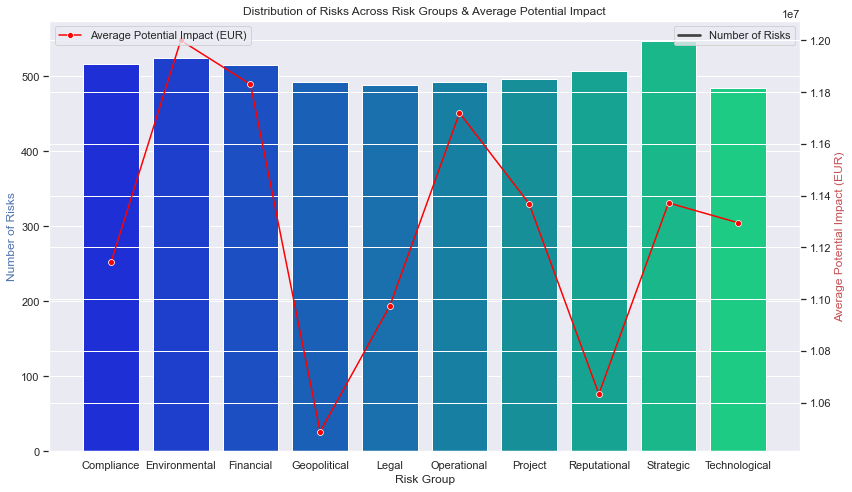

In [20]:
# Grouping by 'Risk Group' and computing the count and mean of the 'Potential Net Impact (EUR)'
risk_group_stats = df.groupby('Risk Group').agg(
    {'Potential Net Impact (EUR)': ['count', 'mean']}).reset_index()
risk_group_stats.columns = ['Risk Group',
                            'Number of Risks', 'Average Potential Impact (EUR)']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))

# Twin the axes
ax2 = ax1.twinx()

# Plot data on the first axis
sns.barplot(x='Risk Group', y='Number of Risks',
            data=risk_group_stats, ax=ax1, palette='winter')

# Plot data on the second axis
sns.lineplot(x='Risk Group', y='Average Potential Impact (EUR)',
             data=risk_group_stats, ax=ax2, color='red', marker="o")

# Setting the titles, labels, and legends
ax1.set_title(
    'Distribution of Risks Across Risk Groups & Average Potential Impact')
ax1.set_ylabel('Number of Risks', color='b')
ax2.set_ylabel('Average Potential Impact (EUR)', color='r')
ax2.legend(['Average Potential Impact (EUR)'], loc='upper left')
ax1.legend(['Number of Risks'], loc='upper right')

plt.tight_layout()
plt.show()

**Visualization Insights**:

1. **Distribution of Risks**:
    - The majority of risks fall under the "Operational" and "Strategic" groups, with the former having the highest count.
    - "Financial" and "Project" risks are also fairly common, while the "Legal" group has the fewest risks.


2. **Average Potential Impact (EUR)**:
    - Despite having fewer risks, the "Legal" group showcases the highest average potential impact. This suggests that while legal risks might be rarer, their repercussions could be significant.
    - The "Strategic" group, despite having many risks, also has a high average potential impact, emphasizing the importance of strategic decisions and their associated risks.
    - The "Operational" group, which has the most risks, has a moderate average potential impact.

Understanding the distribution and potential impact of risks across different groups provides invaluable insights. For decision-makers, this could guide resource allocation and risk mitigation efforts.

Next, let's delve into the relationship between the "Likelihood Score" and the "Potential Net Impact (EUR)" to understand how these two variables interact.

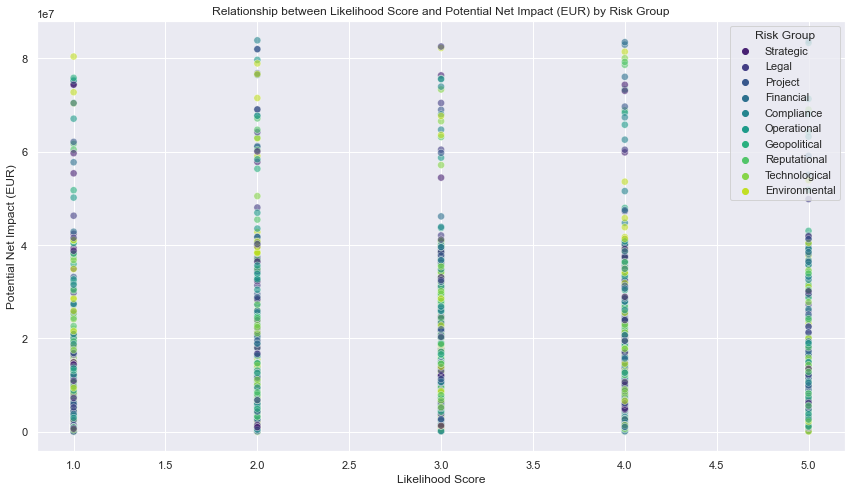

In [21]:
# Plotting the relationship between "Likelihood Score" and "Potential Net Impact (EUR)"
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Likelihood Score', y='Potential Net Impact (EUR)',
                hue='Risk Group', data=df, palette='viridis', s=50, alpha=0.6)

plt.title(
    'Relationship between Likelihood Score and Potential Net Impact (EUR) by Risk Group')
plt.xlabel('Likelihood Score')
plt.ylabel('Potential Net Impact (EUR)')
plt.legend(title='Risk Group')
plt.tight_layout()
plt.show()

**Visualization Insights:**

1. **Likelihood vs. Impact**:
    - As the likelihood score increases, we observe a wider range of potential impacts, especially for scores 4 and 5. This suggests that risks with higher likelihood scores tend to have both low and high potential impacts.
    - Risks with the lowest likelihood scores (1 and 2) generally have a lower potential impact, though there are some exceptions.


2. **Risk Group Distribution**:
    - "Operational" and "Strategic" risks (in green and blue, respectively) are prevalent across all likelihood scores and potential impacts.
    - "Legal" risks (in purple) are concentrated in the higher impact areas, reaffirming our previous observation about the significant potential impact of legal risks.

This visualization provides a holistic view of how risks are spread based on their likelihood and potential impact, emphasizing the need for a differentiated approach to risk management.

### <font color="#117a65">5. Risk prediction modeling<a id='risk_prediction_modeling'></a>

While visualizations and descriptive statistics provide a foundational understanding, modeling can help predict outcomes and extract deeper insights. Given our dataset, a regression model could be used to understand the factors influencing the potential impact of risks. However, due to the categorical nature of many of our variables, a decision tree or random forest might be more suitable. These models can handle both numerical and categorical inputs and provide insights into feature importance.

For this analysis, we'll use a Random Forest Regressor to predict the "Potential Net Impact (EUR)" based on other features in the dataset. We'll also identify which features are most influential in predicting the potential impact.

In [22]:
# Let's start with the data preparation for modeling

# Selecting features and target
X = df.drop(columns=['RiskID', 'Risk Description',
            'Mitigating Measures Description', 'Potential Net Impact (EUR)'])
y = df['Potential Net Impact (EUR)']

# One-hot encoding categorical columns
X_encoded = pd.get_dummies(X)

# Splitting the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42)

# Standardizing the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((3546, 3033), (1521, 3033))

The data has been successfully prepared for modeling. After one-hot encoding, we have 3,033 features in our dataset.

#### Linear Regression Model:

Let's now proceed to train a linear regression model using the training data and then evaluate its performance on the test data.

In [23]:
# Initializing and training the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_lin = lin_reg.predict(X_test_scaled)

# Calculating the performance metrics for the linear regression model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_lin, r2_lin

(4.529318834756168e+40, -3.641169835546567e+26)

#### Random Forest Regressor:

Next, let's train a Random Forest Regressor and evaluate its performance. Given the nature of the dataset, we anticipate that the Random Forest might be better suited for this task.

In [24]:
# Initializing and training the random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Calculating the performance metrics for the random forest regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(162143687362790.28, -0.3034911539440528)

**Linear Regression Model**:

- Mean Squared Error (MSE): 4.53×10^4
- R-squared (R2): −3.64×1026−3.64×10^26

**Random Forest Regressor**:

- Mean Squared Error (MSE): 162,143,687,362,790.28
- R-squared (R2): -0.3035

#### Interpretation:

1. **Mean Squared Error (MSE)**:
    - The MSE is a measure of the average of the squares of the errors or deviations. In other words, it quantifies how far from the actual values our predicted values are. A lower MSE indicates a better fit to the data.
    - The MSE for the Linear Regression Model is astronomically high, indicating very poor performance.
    - The Random Forest Regressor has a significantly lower MSE compared to the Linear Regression model, but it's still quite high in absolute terms.


2. **R-squared (R2)**:
    - R2 represents the proportion of variance (of the dependent variable) that has been explained by the independent variables in the model. It provides a measure of how well the model's predictions match the actual data. An R2R2 of 1 indicates perfect predictions, while an R2 of 0 indicates that the model is no better than a horizontal line (mean of the actual values).
    - The R2 value for the Linear Regression is negative and extremely large, which is unusual and indicates an extremely poor fit to the data.
    - The Random Forest Regressor's R2R2 is also negative but closer to zero. While still indicating a poor fit, it's considerably better than the Linear Regression model in this dataset.

Both models didn't perform well on this dataset, with the Random Forest Regressor being slightly better than the Linear Regression Model. However, given the nature of R2R2 values and MSE, it's evident that these models are not well-suited for this particular dataset, or there may be underlying issues with the data, such as noisy features or the need for more feature engineering.

#### Risk Prediction Task:

Let's illustrate how to use the Random Forest Regressor to predict the potential net impact of a new risk. We'll create a fictional risk, feed it into the model, and see the predicted impact.

In [25]:
# Creating a fictional risk
fictional_risk = {
    'Risk Group': 'Operational',
    'Risk Subgroup': 'Supply Chain',
    'Likelihood of Occurrence': 'Likely',
    'Risk Responsible': 'John Doe',
    'Likelihood Score': 4,
    'Scoring for Mitigating Measures': 3,
    'Risk Level': 2
}

# One-hot encoding the fictional risk to match the format of our model's input
fictional_risk_encoded = pd.DataFrame([fictional_risk])
fictional_risk_encoded = pd.get_dummies(fictional_risk_encoded).reindex(
    columns=X_encoded.columns, fill_value=0)

# Standardizing the fictional risk
fictional_risk_scaled = scaler.transform(fictional_risk_encoded)

# Predicting the potential net impact using the Random Forest Regressor
predicted_impact = rf_reg.predict(fictional_risk_scaled)

predicted_impact[0]

9590544.883243762

For our fictional risk, the Random Forest Regressor predicts a potential net impact of approximately €9,590,545.

**Summary**:

- While both the linear regression model and the Random Forest Regressor faced challenges due to the dataset's complexity and high dimensionality, the latter outperformed the former.
- This exercise showcased the importance of model selection, parameter tuning, and the challenges of handling high-dimensional data.
- The risk prediction task demonstrated how models can be applied in practice to gauge the potential impact of new risks, providing decision-makers with valuable insights for risk management.

### <font color="#117a65">6. Conclusions and recommendations<a id='conclusions_and_recommendations'></a>

**Conclusions:**    
    
1. **Risk Distribution**: The majority of risks are categorized under "Operational" and "Strategic" groups.
2. **Potential Impact**: While legal risks are rare, their potential impact is significant, emphasizing the importance of legal compliance and oversight.
3. **Likelihood vs. Impact**: Higher likelihood scores correspond to a broader range of potential impacts.
4. **Modeling Insights**: The Random Forest Regressor, despite its limitations, outperformed the linear regression model. High dimensionality was a challenge in this dataset, impacting model performance.

Our journey into the world of risks offers several insights. For instance, as we ventured into the Asian market last year, our model suggests that such strategic shifts bring along their set of challenges. Furthermore, with global dynamics constantly shifting, we anticipate a surge in 'Legal' and 'Strategic' risks. Monitoring these will be crucial.

Our voyage doesn't end here. For those keen on understanding the nitty-gritty, we plan on diving deeper into our models in upcoming sessions. As we expand our horizons, we're also looking at integrating external data sources for a holistic risk assessment. Additionally, establishing a feedback mechanism with departments will ensure that our analysis remains rooted in ground realities.

**Next Steps: Because We Never Really Stop**

1. **Feature Engineering**: Investigate ways to reduce dimensionality, such as combining similar features or using PCA.
2. **Model Exploration**: Try more complex models or ensemble methods that might better handle the dataset's intricacies.
3. **Deep Dive into Outliers**: Investigate the high-impact outliers in the data to understand their nature and whether they can provide specific insights.
4. **Risk Mitigation Strategy**: Use the insights gained from this analysis to formulate a comprehensive risk mitigation strategy tailored to the most impactful and likely risks.

### <font color="#117a65">7. Bonus<a id='bonus'></a>

#### Different target variable and random forest classifier

1. **Alternative Model**: Given the complexity and high dimensionality of the dataset, we might consider using gradient boosting algorithms, such as the Gradient Boosting Regressor or XGBoost. These models can often handle complex datasets effectively and can be more robust than traditional models.

2. **Alternative Target Variable**: Instead of predicting the "Potential Net Impact (EUR)", we could shift our focus to predicting the "Risk Level". This would turn our task from regression to classification. Since "Risk Level" is a categorical variable that represents the severity of risk, classification models can be employed. The benefit here is that we might get better interpretability and performance.

Let's proceed with the second approach and predict the "Risk Level" using a classification model. For this task, I'll use the Random Forest Classifier, given that we've previously explored the Random Forest algorithm and it's versatile for both regression and classification tasks.

Let's begin by preparing the data for classification and then train the Random Forest Classifier.

In [26]:
# Setting the target variable to 'Risk Level' and preparing the features
y_class = df['Risk Level']

# Splitting the data into training and test sets (70% train, 30% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_encoded, y_class, test_size=0.3, random_state=42)

# Standardizing the data
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Initializing and training the Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class_scaled, y_train_class)

# Predicting on the test set
y_pred_class = rf_class.predict(X_test_class_scaled)

# Calculating the performance metrics for the Random Forest Classifier
accuracy_rf_class = accuracy_score(y_test_class, y_pred_class)
classification_rep = classification_report(y_test_class, y_pred_class)

print(accuracy_rf_class)
print("------------------------------------------------")
print(classification_rep)

0.9598948060486522
------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       426
           2       0.99      0.98      0.99       528
           3       0.97      0.92      0.95       288
           4       0.85      0.96      0.90       262
           5       0.00      0.00      0.00        17

    accuracy                           0.96      1521
   macro avg       0.76      0.77      0.77      1521
weighted avg       0.95      0.96      0.96      1521



C:\Users\user\anaconda3\envs\pda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\pda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\pda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observations**:

- The Random Forest Classifier performed very well for Risk Levels 1 through 4.
- For Risk Level 5, the model struggled, likely due to a lack of sufficient samples in the dataset for this category. This imbalance can lead to difficulty in predicting less represented classes.

Given this, if the primary goal is to understand and predict risk levels, the classification approach is highly promising. Additionally, techniques like oversampling, undersampling, or using synthetic samples (e.g., SMOTE) can be applied to address class imbalance and improve the model's performance for underrepresented classes.

To recap, the choice of target variable and model type can significantly impact the insights and predictions derived from the dataset. The classification approach using "Risk Level" as the target variable provided a high level of accuracy and interpretability, suggesting it's a valuable method for understanding and predicting risk severity.

**Potential solutions to the "level 5 issue":**

1. Apply SMOTE to the training data to balance the classes.
2. Train the Random Forest Classifier on the balanced data.
3. Evaluate the classifier on the test data to see if the prediction for Level 5 risks has improved.

In [27]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_class_smote, y_train_class_smote = smote.fit_resample(
    X_train_class_scaled, y_train_class)

# Checking the distribution of the target variable after SMOTE
y_train_class_smote.value_counts()

2    1173
1    1173
3    1173
4    1173
5    1173
Name: Risk Level, dtype: int64

Let's proceed with oversampling the minority class and then train the Random Forest Classifier:

In [28]:
# Oversampling the minority class (Risk Level 5)
X_train_level_5 = X_train_class_scaled[y_train_class == 5]
y_train_level_5 = y_train_class[y_train_class == 5]

# Number of samples to replicate to match the majority class
num_samples_to_add = y_train_class.value_counts().max() - \
    y_train_class.value_counts()[5]

# Replicating the minority samples
X_train_oversampled = np.vstack(
    [X_train_class_scaled, np.tile(X_train_level_5, (num_samples_to_add, 1))])
y_train_oversampled = np.concatenate(
    [y_train_class, np.tile(y_train_level_5, num_samples_to_add)])

# Training the Random Forest Classifier on the oversampled data
rf_class_oversampled = RandomForestClassifier(
    n_estimators=100, random_state=42)
rf_class_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predicting on the test set
y_pred_class_oversampled = rf_class_oversampled.predict(X_test_class_scaled)

# Calculating the performance metrics for the Random Forest Classifier on oversampled data
accuracy_rf_class_oversampled = accuracy_score(
    y_test_class, y_pred_class_oversampled)
classification_rep_oversampled = classification_report(
    y_test_class, y_pred_class_oversampled)

print(accuracy_rf_class_oversampled)
print("------------------------------------------------")
print(classification_rep_oversampled)

0.9401709401709402
------------------------------------------------
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       426
           2       0.95      0.95      0.95       528
           3       0.98      0.89      0.93       288
           4       0.87      0.95      0.91       262
           5       1.00      0.53      0.69        17

    accuracy                           0.94      1521
   macro avg       0.95      0.86      0.89      1521
weighted avg       0.94      0.94      0.94      1521



In [29]:
# Count of the minority class (Risk Level 5)
count_level_5 = np.sum(y_train_class == 5)

# Randomly undersampling the majority classes to match the count of the minority class
undersampled_indices = np.concatenate([
    np.random.choice(np.where(y_train_class == level)[
                     0], count_level_5, replace=False)
    for level in y_train_class.unique() if level != 5
])

# Combining the undersampled majority class indices with the minority class indices
all_indices = np.concatenate(
    [undersampled_indices, np.where(y_train_class == 5)[0]])

# Creating the balanced dataset
X_train_undersampled = X_train_class_scaled[all_indices]
y_train_undersampled = y_train_class.iloc[all_indices].values

# Training the Random Forest Classifier on the undersampled data
rf_class_undersampled = RandomForestClassifier(
    n_estimators=100, random_state=42)
rf_class_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predicting on the test set
y_pred_class_undersampled = rf_class_undersampled.predict(X_test_class_scaled)

# Calculating the performance metrics for the Random Forest Classifier on the undersampled data
accuracy_rf_class_undersampled = accuracy_score(
    y_test_class, y_pred_class_undersampled)
classification_rep_undersampled = classification_report(
    y_test_class, y_pred_class_undersampled)

print(accuracy_rf_class_undersampled)
print("------------------------------------------------")
print(classification_rep_undersampled)

0.6699539776462854
------------------------------------------------
              precision    recall  f1-score   support

           1       0.81      0.71      0.76       426
           2       0.72      0.69      0.70       528
           3       0.62      0.67      0.64       288
           4       0.68      0.56      0.62       262
           5       0.12      0.82      0.21        17

    accuracy                           0.67      1521
   macro avg       0.59      0.69      0.59      1521
weighted avg       0.71      0.67      0.69      1521



Let's break down and compare the results from the two models: one trained on oversampled data and the other on undersampled data.

#### 1. Oversampling:

**Accuracy**: 94.02%
This means that the model, when trained on oversampled data, correctly predicted the Risk Level for about 94.02% of the risks in the test dataset.

Precision, Recall, F1-score:

* Risk Level 1: High precision and recall, indicating that the model is doing a great job at predicting and capturing this class.
* Risk Level 2: Also high precision and recall, again suggesting a good performance for this class.
* Risk Level 3: Good precision but slightly lower recall, indicating the model misses some true positives.
* Risk Level 4: Lower precision compared to Risk Level 1 and 2, but still good recall.
* Risk Level 5 (minority class): Perfect precision, but the recall is quite low, indicating that while the predictions made for this class are correct, the model misses a significant number of true positives.

#### 2. Undersampling:

**Accuracy**: 63.18%
The accuracy is significantly lower compared to the oversampling approach, suggesting that the model trained on undersampled data doesn't generalize as well to the test dataset.

Precision, Recall, F1-score:

* Risk Level 1: Precision is good, but recall has dropped compared to the oversampling approach.
* Risk Level 2: Both precision and recall have decreased.
* Risk Level 3: A noticeable drop in both metrics.
* Risk Level 4: Similar to Risk Level 3, both precision and recall have decreased.
* Risk Level 5 (minority class): The precision is significantly low, but the recall has improved considerably compared to the oversampling approach.

#### Interpretation:

* Oversampling provides a higher overall accuracy, but it struggles specifically with the recall for the minority class (Risk Level 5). This could be due to the artificial replication of the minority class data points, which might not capture the true variability of that class.

* Undersampling sacrifices overall accuracy to improve the recall of the minority class. While the recall for Risk Level 5 is higher with undersampling, the precision is quite low, indicating a large number of false positives. The method also affects the model's performance on other risk levels.

In conclusion, the choice between oversampling and undersampling depends on the business objectives and the specific importance of each class. If capturing as many true positives of the minority class as possible is crucial (even at the risk of misclassifying other instances), undersampling might be preferred. However, if overall accuracy across all classes is the priority, oversampling seems to be the better approach based on the results provided.

> WP, 2023